<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Build_Machine_Learning_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# **Dataset**

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# **Split Dataset into Training and Testing Set**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# **Machine Learning Model Pipeline**

In [59]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear')
from sklearn.svm import SVC
#from sklearn.neighbors import kneighborsClassifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipline =[]
model_pipline.append(LogisticRegression (solver='liblinear'))
model_pipline.append(SVC())
model_pipline.append(KNeighborsClassifier())
model_pipline.append(DecisionTreeClassifier())
model_pipline.append(RandomForestClassifier())
model_pipline.append(GaussianNB())

# **Model Evaluation**

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


In [65]:
model_list=['logistic Regression','SVM','KNN', 'DT', 'RF','NB']
acc_list = []
auc_list = []
cm_list = []

In [66]:
for model in model_pipline:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  fpr, tpr, _thresholds = roc_curve(y_test, y_pred, pos_label=1)
  auc_list.append (round(metrics.auc(fpr, tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

**Confusion matrix**

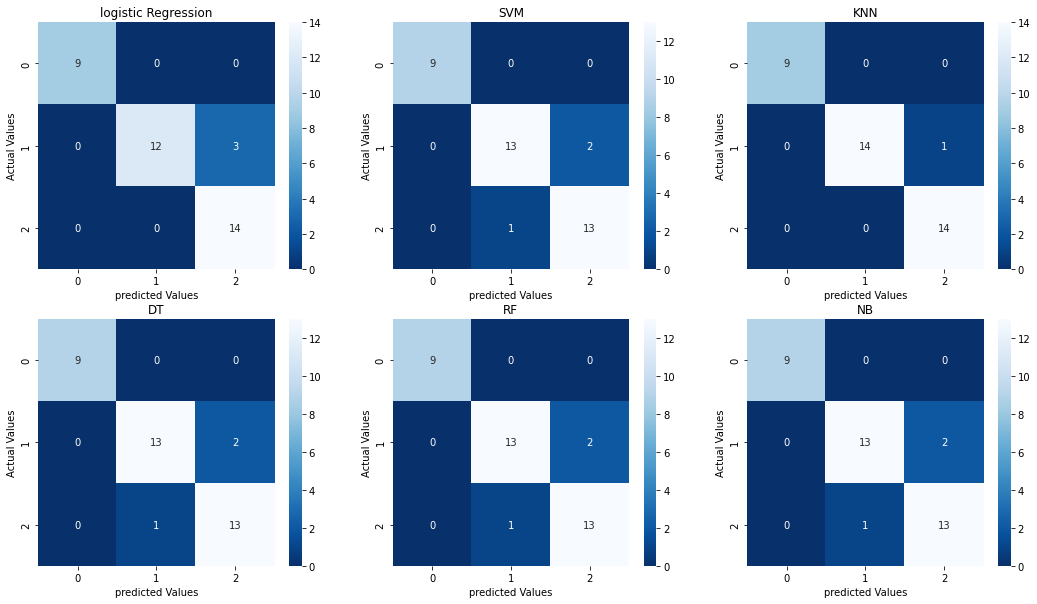

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns 
fig = plt.figure (figsize = (18,10))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot = sns.heatmap(cm, annot= True, cmap ='Blues_r')
  cm_plot.set_xlabel('predicted Values')
  #cm_plot.set_ylablel('Actual Values')
  cm_plot.set_ylabel('Actual Values')

**Accuracy**

In [ ]:
#result_df= pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df =pd.DataFrame({'Model':model_list, 'Accuracy': acc_list,'AUC': auc_list })
result_df

# **References**

[1-Top 6 Machine Learning Algorithms for Classification](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)